# Bar Charts 


<div style="margin-top: 20px">

<font size = 3>
    
We will learn about a visualization tool namely **Bar Chart**, and learn how to create it using Matplotlib. 

A bar chart is a very popular visualization tool. a bar chart, also known as a bar graph, is a type of plot where the length of each bar is proportional to the value of the item that it represents. It is commonly used to compare the values of a variable at a given point in time. 

For example, we are interested in visualizing the gdp of countries in North America. 

</font>
</div>

## Exploring Datasets with pandas

pandas is an essential data analysis toolkit for Python. From their [website](https://pandas.pydata.org/):

> pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

The lab relies on pandas for data wrangling, analysis, and visualization. We encourage you to spend some time and familizare yourself with the pandas API Reference: [http://pandas.pydata.org/pandas-docs/stable/api.html.](http://pandas.pydata.org/pandas-docs/stable/api.html)

## The Dataset: gdp of Countries in North America (year 1952 - 2007)

The dataset contains the gdp data for the countries in North America. The current version presents data pertaining to 14 countries.

You may access the data [here] (https://raw.githubusercontent.com/arpgpt/data-visualization/master/north_america.csv)


#### Matplotlib

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.
To know more about matplotlib library, refer to the link [here](https://matplotlib.org/)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

#### panda Basics

We will now import the **pandas** module.

In [3]:
import pandas as pd
df_na = pd.read_csv('https://raw.githubusercontent.com/arpgpt/data-visualization/master/north_america.csv',index_col='country')

- Before plotting, we convert the column headings from a string to integer data type, since they represent numerical values.
- Extract year from last 4 characters of each column name.
- The current column names are structured as 'gdpPercap_(year)', 
- so we want to keep the (year) part only for clarity when plotting GDP vs. years
- To do this we use strip(), which removes from the string the characters stated in the argument
- This method works on strings, so we call str before strip()

In [7]:
years=df_na.columns.str.strip('gdpPercap_')
df_na.columns = years.astype('int')

We will now plot a bar chart for all the countries in North America

<AxesSubplot:xlabel='country'>

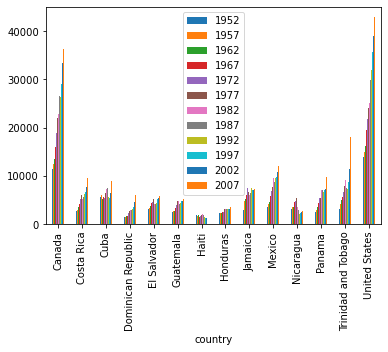

In [8]:
df_na.plot(kind='bar')

This seems too crowded. Let's plot the data for a specific country. 'Panama' as an example: 
We will use *loc* to specify the country name.

<AxesSubplot:>

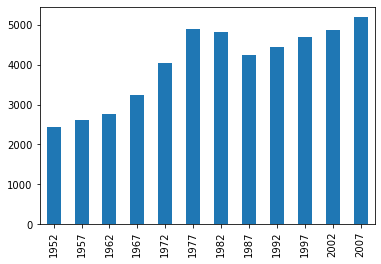

In [9]:
df_na.loc['Guatemala'].plot(kind='bar')

Similary, we will now plot data for first 2 countries in our data set using *iloc*

<AxesSubplot:xlabel='country'>

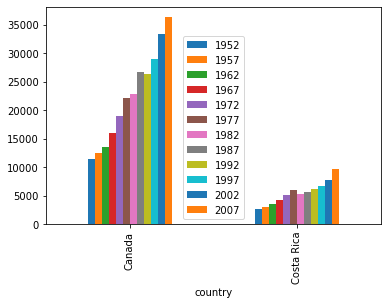

In [10]:
df_na.iloc[0:2].plot(kind='bar')


We may also plot data for specific number of rows and columns using **iloc**. 
The syntax for the same is *dataframe.iloc[row, column].plot()*


<AxesSubplot:xlabel='country'>

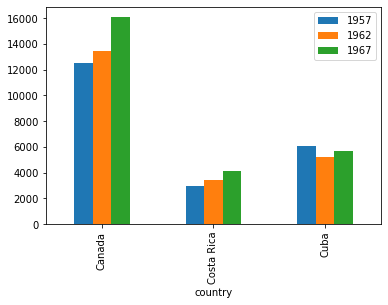

In [13]:
df_na.iloc[0:3,1:4].plot(kind='bar')

#### Change position of Legend

We may change the position of the legend on our graph by explicitly specifying the desired position.
By defaut the position is 'upper right'
Some other positions that can be defined for a legend are: 

<img src ="https://raw.githubusercontent.com/arpgpt/data-visualization/master/legend.jpg" align="left">


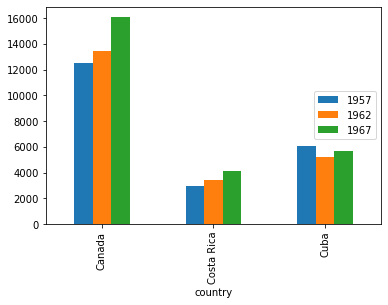

In [14]:
df_na.iloc[0:3,1:4].plot(kind='bar')
plt.legend(loc='right')

#### Horizontal Bar Chart

While the default Bar Chart is vertically aligned, We may plot a horizontal bar chart by explicitly specifiying the the chart type. 

<AxesSubplot:>

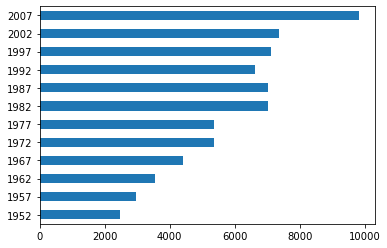

In [15]:
df_na.loc['Panama'].plot(kind='barh')

#### Colors of Bars
We may change the bar color and add some other visual features.

- To change the color, we specify the color as an attribute for plot()

<AxesSubplot:>

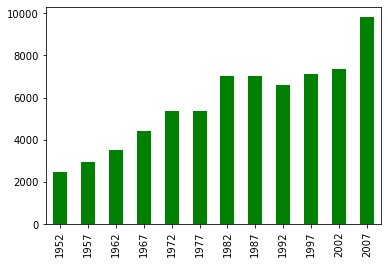

In [16]:
df_na.loc['Panama'].plot(kind='bar',color='green')

#### Control borders of Bar Charts
- We may even add colored edges to the bars.

<AxesSubplot:>

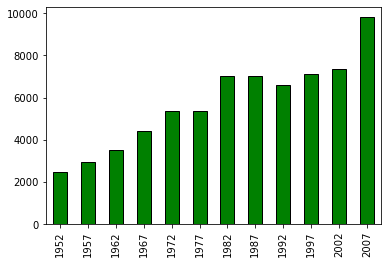

In [18]:
df_na.loc['Panama'].plot(kind='bar',color='green',edgecolor='black')

#### Add title and axes labels/ Custom labels
- As a good coding hygiene we should always add labels to our axes.
- We will also 
    - change the default color of our labels to the desired one.
    - change orientation of labels on the x-axis to 45 degrees.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

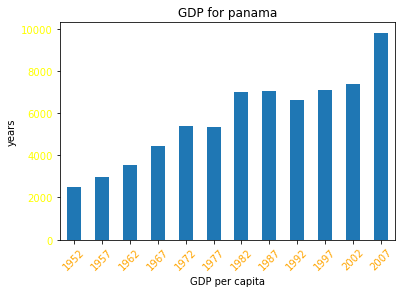

In [19]:
df_na.loc['Panama'].plot(kind='bar')
plt.title('GDP for panama')
plt.xlabel('GDP per capita')
plt.ylabel('years')
plt.xticks(color='orange',rotation=45)
plt.yticks(color='yellow')

#### Add pattern to bars in bar chart
- We may add a specific pattern to the bars in the bar chart

As an example, we added 'X' to the bars here.
You may try out the following patterns:
- /
- |
- -
- +
- x
- o
- O
- .
- *

Each value corresponds to a different hatching pattern.

<AxesSubplot:>

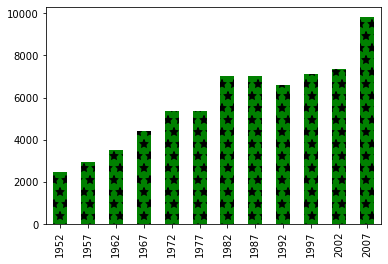

In [20]:
df_na.loc['Panama'].plot(kind='bar',hatch='*',color='green')

#### Bar Chart with number of observation

We will now plot the bar chart along with the individual observations of each bar in the bar chart.

**Display the data set for Panama:** 
We may also define a new data frame with data set specific to the desired location (Panama in this case) and use that newly created data frame.

In [21]:
df_panama=df_na.loc['Panama']
df_panama

1952    2480.380334
1957    2961.800905
1962    3536.540301
1967    4421.009084
1972    5364.249663
1977    5351.912144
1982    7009.601598
1987    7034.779161
1992    6618.743050
1997    7113.692252
2002    7356.031934
2007    9809.185636
Name: Panama, dtype: float64

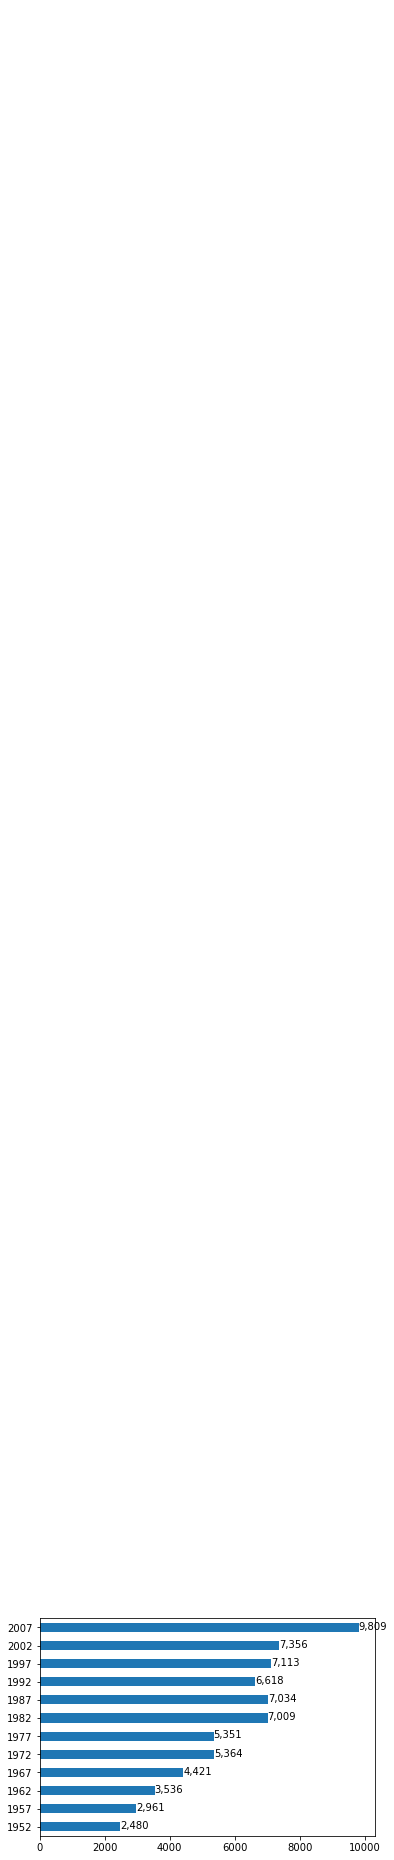

In [24]:
df_panama.plot(kind='barh')
for index,value in enumerate(df_panama):
    label=format(int(value),',')
    plt.annotate(label,xy=(value,index-0.10),color='black')
    plt.annotate(label,xy=(1952,100),color='black')

We can also plot the same bar graph vertically using style sheets available. Use ***style.use()***

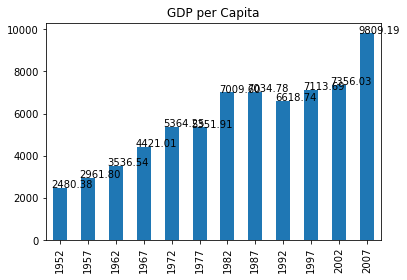

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
ax = df_na.loc['Panama'].plot(kind='bar')
plt.title('GDP per Capita')
x_offset=-0.3
y_offset=0.2
for p in ax.patches:
    b=p.get_bbox()
    val = "{:.2f}".format(b.y1+b.y0)
    ax.annotate(val,((b.x0+b.x1)/2+x_offset,b.y1+y_offset))

## Hand-on Practice (Optional)

Here you will put your knowledge into action:
    
Access the data set for Europe [here](https://raw.githubusercontent.com/arpgpt/data-visualization/master/gdp_europe.csv) and implement what you learnt in the lab!

Happy Learning!

<AxesSubplot:xlabel='country'>

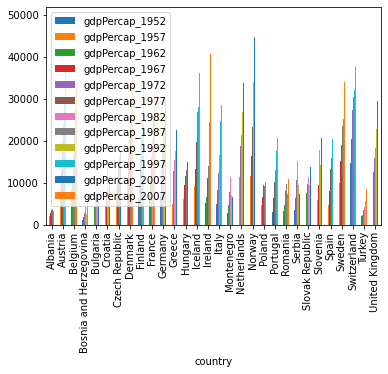

In [28]:
df_e = pd.read_csv('https://raw.githubusercontent.com/arpgpt/data-visualization/master/gdp_europe.csv',index_col='country')
df_e.plot(kind='bar')